The critical radius is 0.0836 m
The mass of the sphere has to be bigger than 46 kg
We work with a sphere of radius 0.085 m


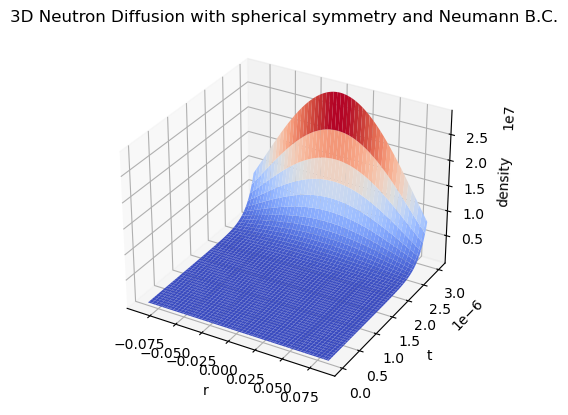

In [1]:
# 3D analysis in spherical coordinates - Neumann Boundary Conditions

# We are studying the neutron diffusion in 3-dimensions and with spherical symmetry. 
# Neumann Boundary Conditions are more likely to represent a physical situation.  
# We find the critical dimension (radius of the sphere) of the fissile material, its critical mass and then
# the evolution of the neutron density as a function of time.
# 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource, Normalize
import scipy.integrate as spi
import scipy.special as sc
from scipy import optimize
from mpl_toolkits import mplot3d
from matplotlib import cm

# Reading parameters from an external file .txt
file1 = open('/Users/enrico.perboni14/Desktop/Tesi Magistrale/Uranium235.txt', "r")
read_content = file1.readlines()[0 : 4]
values = list(range(4))
for i in range(0,4):
    values[i] = read_content[i].split()
for i in range(0,4):
    exec("%s = %f" % (values[i][0],float(values[i][2])))
file1.close()
    
# criticality condition for Neumann Boundary condition
# we need to solve the BC to find the critical radius
k_critical = np.sqrt(eta/mu)

neumann_bc_critical = lambda r : -1 + k_critical*r*np.cos(k_critical*r)/np.sin(k_critical*r) + 3/2*r/lamda_t
root = optimize.root_scalar(neumann_bc_critical, x0=0.1, x1=1)

radius_neumann_critical = root.root
critical_volume_neumann = 4/3*np.pi*radius_neumann_critical**3
critical_mass_neumann = rho*critical_volume_neumann
r_neumann = round(radius_neumann_critical, 3) + 0.001

print('The critical radius is', round(radius_neumann_critical, 4), 'm')
print('The mass of the sphere has to be bigger than', round(critical_mass_neumann), 'kg')
print('We work with a sphere of radius',r_neumann, 'm') 

# setting a maximum value for the time
T_neum = 3e-6

# we need to solve again the boundary condition to find the value of alpha related to r neumann
def neumann_boundary(k):
     return  k*r_neumann*np.cos(k*r_neumann)/np.sin(k*r_neumann) + 3/2*r_neumann/lamda_t - 1

K = optimize.root_scalar(neumann_boundary, x0=30, x1=1)
alpha = K.root**2*mu - eta 

def neutron_density_neumann(t,r):
    return np.exp(-alpha*t)*np.sin(K.root*r)/r

neutron_diffusion_neumann_plot = plt.figure()
ax = plt.axes(projection = '3d')
t = np.linspace(T_neum, 0, 100)
r = np.linspace(-r_neumann, r_neumann, 100)
T, R = np.meshgrid(t,r)
N = neutron_density_neumann(T, R)
surf = ax.plot_surface(R,T , N, cmap=cm.coolwarm,
               linewidth=1)
ax.set_xlabel('r')
ax.set_ylabel('t')
ax.set_zlabel('density')
ax.set_title('3D Neutron Diffusion with spherical symmetry and Neumann B.C.')

plt.show()